# Calculate Biological Matrix Effect

This code computes the effects conferred by diverse biological matrices on retention time and ion count of individual metabolites spiked into these matrices at a fixed concentration.

The five biological matrices tested are: 

- germ-free murine feces
- germ-free murine urine
- germ-free murine serum
- charcoal-stripped human serum
- bacterial mega media

The collection of spiked-in metabolites are a subset of metabolites from our compound library, and are detected at one or more of the three analytical modes (c18positive, c18negative, and hilicpositive) as used in our methods.

In [7]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd

## Calculate biological matrix effect on ion count and retention time on a per-metabolite, per method basis.


In [8]:
def plot_ion_counts_hist(ion_counts_data):
    """
    On a per-metabolite, per-method basis, changes in total ion count are calculated by 
    1) removing matrix-specific, background ion counts from both biological matrices and library blank control (50% MoH), 
    2) calculating the ratio between spike-in metabolite ion counts in biological matrices vs. those in library blank controls
    (relative fold change, log2-transformed). 
    """
    control_avg = ion_counts_data[['Control_1', 'Control_2', 'Control_3']].mean(axis=1)

    control_normalized_avg = pd.DataFrame({
        'Control_1_normalized': ion_counts_data['Control_spikein_1'] - control_avg,
        'Control_2_normalized': ion_counts_data['Control_spikein_2'] - control_avg,
        'Control_3_normalized': ion_counts_data['Control_spikein_3'] - control_avg,
    }).mean(axis=1)

    biological_matrices = ['Mouse_feces', 'Mouse_urine', 'Mouse_serum', 'Human_serum', 'Bacterial_media']
    biological_matrix_colors = ['tab:brown', 'tab:orange', 'tab:red', 'maroon', 'gold']

    fig, axs = plt.subplots(len(biological_matrices),
                            1,
                            figsize=(5, 5 * len(biological_matrices)))

    for idx, biological_matrix in enumerate(biological_matrices):
        biological_matrix_avg = ion_counts_data[[f'{biological_matrix}_1', f'{biological_matrix}_2', f'{biological_matrix}_3']].mean(axis=1)
        biological_matrix_normalized_avg = pd.DataFrame({
            f'{biological_matrix}_1_normalized': (ion_counts_data[f'{biological_matrix}_spikein_1'] - biological_matrix_avg) / control_normalized_avg,
            f'{biological_matrix}_2_normalized': (ion_counts_data[f'{biological_matrix}_spikein_2'] - biological_matrix_avg) / control_normalized_avg,
            f'{biological_matrix}_3_normalized': (ion_counts_data[f'{biological_matrix}_spikein_3'] - biological_matrix_avg) / control_normalized_avg,
        }).mean(axis=1)

        ion_counts_data[f'{biological_matrix}_normalized_average'] = biological_matrix_normalized_avg

        ax = axs[idx]

        values = biological_matrix_normalized_avg.values
        values[values <= 0] = np.nan

        ax.hist(np.log2(values),
                bins=np.linspace(-6, 4, 21),
                edgecolor='black',
                linewidth=1.0,
                color=biological_matrix_colors[idx])

        ax.set_xlim(-6, 4)
        ax.set_ylim(0, 80)

        ax.set_title(biological_matrix)
        ax.set_xlabel('Relative fold change in ion counts (log2)')
        ax.set_ylabel('# of Compounds')

    plt.tight_layout()

    
def plot_rt_hist(rt_data):
    """
    On a per-metabolite, per-method basis, RT difference is calculated between RTs detected in individual biological matrix
    from those detected in library blank control (50% methanol in water v/v). 
    """
    control_spikein_avg = rt_data[['Control_spikein_1', 'Control_spikein_2', 'Control_spikein_3']].mean(axis=1)

    biological_matrices = ['Mouse_feces', 'Mouse_urine', 'Mouse_serum', 'Human_serum', 'Bacterial_media']
    biological_matrix_colors = ['tab:brown', 'tab:orange', 'tab:red', 'maroon', 'gold']

    fig, axs = plt.subplots(len(biological_matrices),
                            1,
                            figsize=(5, 5 * len(biological_matrices)))

    for idx, biological_matrix in enumerate(biological_matrices):
        biological_matrix_normalized_avg = pd.DataFrame({
            f'{biological_matrix}_1_normalized': rt_data[f'{biological_matrix}_spikein_1'] - control_spikein_avg,
            f'{biological_matrix}_2_normalized': rt_data[f'{biological_matrix}_spikein_2'] - control_spikein_avg,
            f'{biological_matrix}_3_normalized': rt_data[f'{biological_matrix}_spikein_3'] - control_spikein_avg,
        }).mean(axis=1)

        rt_data[f'{biological_matrix}_normalized_average'] = biological_matrix_normalized_avg

        ax = axs[idx]

        ax.hist(biological_matrix_normalized_avg,
                bins=np.linspace(-0.1, 0.1, 21),
                edgecolor='black',
                linewidth=1.0,
                color=biological_matrix_colors[idx])

        ax.set_xlim(-0.1, 0.1)
        ax.xaxis.set_major_locator(ticker.MultipleLocator(0.05))

        ax.set_ylim(0, 150)

        ax.set_title(biological_matrix)
        ax.set_xlabel('Retention time difference (min)')
        ax.set_ylabel('# of Compounds')

    plt.tight_layout()

In [9]:
ion_counts_data = pd.read_excel('input/Supplementary_Table_2_experimental_validation.xlsx', sheet_name='matrix_effects_ion_count')
ion_counts_data

,dname,Compound,Mode,Control_1,Control_2,Control_3,Control_spikein_1,Control_spikein_2,Control_spikein_3,Mouse_feces_1,...,Human_serum_3,Human_serum_spikein_1,Human_serum_spikein_2,Human_serum_spikein_3,Bacterial_media_1,Bacterial_media_2,Bacterial_media_3,Bacterial_media_spikein_1,Bacterial_media_spikein_2,Bacterial_media_spikein_3
0,m_c18n_0001,N-ACETYLTRYPTOPHAN,c18negative,0,0,0,703746,682192,751165,676,...,0,574786,668414,607632,4261,3766,3363,528919,533211,502434
1,m_c18n_0002,5-HYDROXYINDOLE,c18negative,0,0,0,21188,19043,19841,0,...,0,19000,24956,20893,0,0,0,20219,23890,19883
2,m_c18n_0014,3-METHYLADIPIC ACID,c18negative,0,0,0,172290,174337,188481,0,...,0,12589,13353,12919,196,352,0,13112,12867,12560
3,m_c18n_0015,3-(4-HYDROXYPHENYL)PROPIONIC ACID,c18negative,0,0,0,87363,89030,94714,0,...,0,88373,98237,93935,110,0,0,75862,85744,72969
4,m_c18n_0019,PYROGLUTAMIC ACID,c18negative,358,421,149,188842,192275,201277,4442,...,0,30571,33376,32518,373311,380802,328088,371323,437913,376518
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,m_hilicp_0335,GLYCOCHOLIC ACID,hilicpositive,16187,5016,15006,328987,324489,323131,10321,...,583,304957,339806,300731,6315,4597,2291,95089,150200,242753
214,m_hilicp_0339,TAUROURSODEOXYCHOLIC ACID_PEAK1,hilicpositive,811,287,818,1792764,1783228,1812338,53781,...,701,1748978,1907498,1918406,1114,1246,405,1350555,1203485,1273794
215,m_hilicp_0340,TAUROURSODEOXYCHOLIC ACID_PEAK2,hilicpositive,1725,210,301,2460734,2323945,2480580,46218,...,1119,2303367,2437943,2221159,1648,1056,1241,1589827,1794870,1571559
216,m_hilicp_0341,RAFFINOSE,hilicpositive,0,0,0,139207,126042,127234,1827340,...,171,136025,154146,129228,28642,27332,25557,92896,96058,95252


### Histograms of biological matrix effect on ion count

The majority of spiked-in metabolites (e.g., 97% in feces) exhibit less than 4-fold change in ion counts relative to those detected at the library control condition.


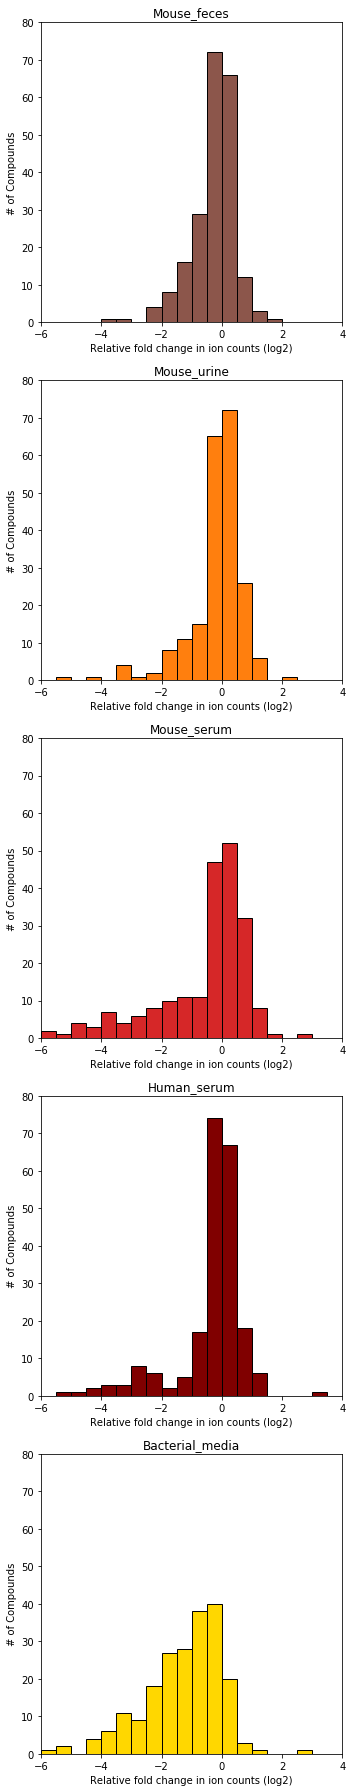

In [10]:
plot_ion_counts_hist(ion_counts_data)

In [11]:
rt_data = pd.read_excel('input/Supplementary_Table_2_experimental_validation.xlsx', sheet_name='matrix_effects_retention_time')
rt_data

,dname,Compound,Mode,Control_1,Control_2,Control_3,Control_spikein_1,Control_spikein_2,Control_spikein_3,Mouse_feces_1,...,Human_serum_3,Human_serum_spikein_1,Human_serum_spikein_2,Human_serum_spikein_3,Bacterial_media_1,Bacterial_media_2,Bacterial_media_3,Bacterial_media_spikein_1,Bacterial_media_spikein_2,Bacterial_media_spikein_3
0,m_c18n_0001,N-ACETYLTRYPTOPHAN,c18negative,2.951,2.948,2.948,2.957,2.946,2.957,2.937,...,2.952,2.944,2.945,2.950,2.938,2.940,2.948,2.946,2.945,2.937
1,m_c18n_0002,5-HYDROXYINDOLE,c18negative,3.818,3.815,3.815,3.816,3.813,3.815,3.820,...,3.819,3.828,3.812,3.825,3.813,3.815,3.814,3.821,3.812,3.812
2,m_c18n_0014,3-METHYLADIPIC ACID,c18negative,0.768,0.765,0.765,0.758,0.755,0.757,0.762,...,0.769,0.745,0.745,0.742,0.755,0.757,0.765,0.813,0.812,0.804
3,m_c18n_0015,3-(4-HYDROXYPHENYL)PROPIONIC ACID,c18negative,4.001,3.998,3.998,3.999,3.996,4.007,3.995,...,4.002,4.003,3.995,4.000,3.988,3.999,3.998,4.004,4.003,3.995
4,m_c18n_0019,PYROGLUTAMIC ACID,c18negative,0.852,0.840,0.849,0.841,0.838,0.840,0.846,...,0.844,0.853,0.854,0.851,0.847,0.849,0.848,0.846,0.845,0.845
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,m_hilicp_0335,GLYCOCHOLIC ACID,hilicpositive,5.712,5.718,5.777,5.696,5.694,5.693,5.786,...,5.617,5.699,5.699,5.696,5.712,5.736,5.709,5.677,5.684,5.693
214,m_hilicp_0339,TAUROURSODEOXYCHOLIC ACID_PEAK1,hilicpositive,5.062,5.110,5.086,5.104,5.111,5.102,5.169,...,5.109,5.099,5.099,5.105,5.112,5.069,5.076,5.102,5.092,5.102
215,m_hilicp_0340,TAUROURSODEOXYCHOLIC ACID_PEAK2,hilicpositive,5.312,5.310,5.294,5.321,5.319,5.318,5.369,...,5.326,5.324,5.324,5.321,5.262,5.336,5.284,5.319,5.317,5.318
216,m_hilicp_0341,RAFFINOSE,hilicpositive,9.278,9.285,9.285,9.279,9.277,9.276,9.277,...,9.267,9.282,9.273,9.279,9.295,9.294,9.350,9.285,9.292,9.285


### Histograms of biological matrix effect on retention time (RT)

100% of spiked-in metabolites show minimal change in RT, falling within a +/- 0.1 minute window from their RTs determined in the library control condition. 


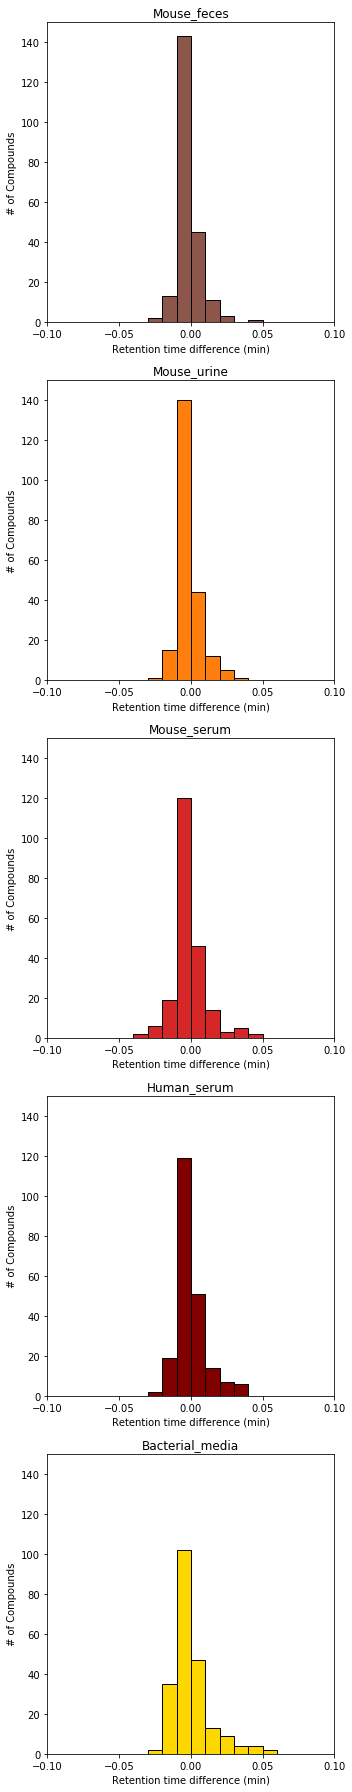

In [12]:
plot_rt_hist(rt_data)